# Pandas Tutorial


Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load required modules. Each time you start your server, you will need to execute this cell again to load these modules.

Throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Moreover, please be sure to only put your written answers in the provided cells. 

In [1]:
# Don't change this cell; just run it. 

import numpy as np
import pandas as pd


# These lines do some fancy plotting magic.\n",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## 1. Differences between Universities

**Question 1.** Suppose you're choosing a university to attend, and you'd like to *quantify* how *dissimilar* any two universities are.  You rate each university you're considering on several numerical traits.  You decide on a very detailed list of 1000 traits, and you measure all of them!  Some examples:

* The cost to attend (per year).
* The average Yelp review of nearby Thai restaurants.
* The USA Today ranking of the Medical school.
* The USA Today ranking of the Engineering school.

You decide that the dissimilarity between two universities is the *total* of the differences in their traits.  That is, the dissimilarity is:

* the **sum** of
* the absolute values of
* the 1000 differences in their trait values.

In the next cell, we've loaded arrays containing the 1000 trait values for Stanford and Berkeley.  Compute the dissimilarity (according to the above technique) between Stanford and Berkeley.  Call your answer `dissimilarity`.  Use a single line of code to compute the answer.

*Note:* The data we're using aren't real -- we made them up for this exercise, except for the cost-of-attendance numbers, which were found online.

In [2]:
stanford = pd.read_csv("stanford.csv")["Trait value"].to_numpy()
berkeley = pd.read_csv("berkeley.csv")["Trait value"].to_numpy()

dissimilarity = np.sum(np.abs(stanford-berkeley))
dissimilarity

14060.55870106792

**Question 2.** Why do we sum up the absolute values of the differences in trait values, rather than just summing up the differences?

Because this is the difference between the two schools, as apposed to the difference from stanford to berkely or vice versa. This gives us the same value regardless of the order of subtraction.

##### Weighing the traits
After computing dissimilarities between several schools, you notice a problem with your method: the scale of the traits matters a lot.

Since schools cost tens of thousands of dollars to attend, the cost-to-attend trait is always a much bigger *number* than most other traits.  That makes it affect the dissimilarity a lot more than other traits.  Two schools that differ in cost-to-attend by $\$900$, but are otherwise identical, get a dissimilarity of $900$.  But two schools that differ in graduation rate by $0.9$ (a huge difference!), but are otherwise identical, get a dissimilarity of only $0.9$.

One way to fix this problem is to assign different "weights" to different traits. For example, we could fix the problem above by multiplying the difference in the cost-to-attend traits by $.001$, so that a difference of $\$900$ in the attendance cost results in a dissimilarity of $\$900 \times .001$, or $0.9$.

Here's a revised method that does that for every trait:

1. For each trait, subtract the two schools' trait values.
2. Then take the absolute value of that difference.
3. Now multiply that absolute value by a trait-specific number, like $.001$ or $2$.
4. Now, sum the 1000 resulting numbers.

**Question 3.** Suppose you've already decided on a weight for each trait.  These are loaded into an array called `weights` in the cell below.  `weights.item(0)` is the weight for the first trait, `weights.item(1)` is the weight for the second trait, and so on.  Use the revised method to compute a revised dissimilarity between Berkeley and Stanford.

*Hint:* Using array arithmetic, your answer should be almost as short as in question 1.

In [3]:
weights = pd.read_csv("weights.csv")["Weight"].to_numpy()

revised_dissimilarity = np.sum(weights*np.abs((stanford-berkeley)))
revised_dissimilarity

505.98313211458844

## 2. Unemployment


The Federal Reserve Bank of St. Louis publishes data about jobs in the US.  Below, we've loaded data on unemployment in the United States. There are many ways of defining unemployment, and our dataset includes two notions of the unemployment rate:

1. Among people who are able to work and are looking for a full-time job, the percentage who can't find a job.  This is called the Non-Employment Index, or NEI.
2. Among people who are able to work and are looking for a full-time job, the percentage who can't find any job *or* are only working at a part-time job.  The latter group is called "Part-Time for Economic Reasons", so the acronym for this index is NEI-PTER.  (Economists are great at marketing.)

The source of the data is [here](https://fred.stlouisfed.org/categories/33509).

**Question 1.** The data are in a CSV file called `unemployment.csv`.  Load that file into a table called `unemployment`.

In [5]:
unemployment = pd.read_csv('unemployment.csv')
unemployment.head()

,Date,NEI,NEI-PTER
0,1994-01-01,10.0974,11.1720
1,1994-04-01,9.6239,10.7883
2,1994-07-01,9.3276,10.4831
3,1994-10-01,9.1071,10.2361
4,1995-01-01,8.9693,10.1832


**Question 2.** Sort the data in descending order by NEI, naming the sorted table `by_nei`.  Create another table called `by_nei_pter` that's sorted in descending order by NEI-PTER instead.

In [6]:
by_nei = unemployment.sort_values('NEI')
by_nei_pter = unemployment.sort_values('NEI-PTER')

**Question 3.** Use `take` to make a table containing the data for the 10 quarters when NEI was greatest.  Call that table `greatest_nei`.

In [7]:
greatest_nei = unemployment.take(unemployment.sort_values('NEI',ascending=False)[:10].index)
greatest_nei

,Date,NEI,NEI-PTER
63,2009-10-01,10.9698,12.8557
64,2010-01-01,10.9054,12.7311
62,2009-07-01,10.8089,12.7404
61,2009-04-01,10.7082,12.5497
65,2010-04-01,10.6597,12.5664
67,2010-10-01,10.5856,12.4329
66,2010-07-01,10.5521,12.3897
68,2011-01-01,10.5024,12.3017
70,2011-07-01,10.4856,12.2507
69,2011-04-01,10.4409,12.2470


**Question 4.** It's believed that many people became PTER (recall: "Part-Time for Economic Reasons") in the "Great Recession" of 2008-2009.  NEI-PTER is the percentage of people who are unemployed (and counted in the NEI) plus the percentage of people who are PTER.  Compute an array containing the percentage of people who were PTER in each quarter.  (The first element of the array should correspond to the first row of `unemployment`, and so on.)

*Note:* Use the original `unemployment` table for this.

In [9]:
pter = np.abs(unemployment['NEI-PTER']-unemployment['NEI'])
pter[:5]

0    1.0746
1    1.1644
2    1.1555
3    1.1290
4    1.2139
dtype: float64

**Question 5.** Add `pter` as a column to `unemployment` (named "PTER") and sort the resulting table by that column in descending order.  Call the table `by_pter`.

Try to do this with a single line of code, if you can.

In [10]:
by_pter = pd.DataFrame({'Date':unemployment['Date'], 'NEI':unemployment['NEI'], 'PTER':pter,
                        'NEI-PTER':unemployment['NEI-PTER']})
by_pter.head()

,Date,NEI,PTER,NEI-PTER
0,1994-01-01,10.0974,1.0746,11.1720
1,1994-04-01,9.6239,1.1644,10.7883
2,1994-07-01,9.3276,1.1555,10.4831
3,1994-10-01,9.1071,1.1290,10.2361
4,1995-01-01,8.9693,1.2139,10.1832


**Question 6.** Create a line plot of the PTER over time. To do this, first add the `year` array and the `pter` array to the `unemployment` table; label these columns "Year" and "PTER", respectively. Then, generate a line plot using one of the table methods you've learned in class. Assign this new table to `pter_over_time`.

**Note:** If you're failing the test, but your plot looks correct, make sure that in your `unemployment` table, the "Year" column comes before the "PTER" column.

<AxesSubplot:xlabel='Year'>

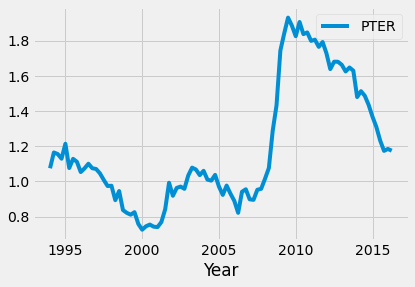

In [11]:
year = 1994 + np.arange(len(by_pter))/4

unemployment['Year'] = year
unemployment['PTER'] = pter

pter_over_time = unemployment
pter_over_time.plot(kind='line', x='Year', y='PTER')

**Question 7.** Were PTER rates high during or directly after the Great Recession (that is to say, were PTER rates particularly high in the years 2008 through 2011)? Assign highPTER to `True` if you think PTER rates were high in this period, and `False` if you think they weren't. 

In [12]:
highPTER = True

## 3. Birth Rates


The following table gives census-based population estimates for each state on both July 1, 2015 and July 1, 2016. The last four columns describe the components of the estimated change in population during this time interval. **For all questions below, assume that the word "states" refers to all 52 rows including Puerto Rico & the District of Columbia.**

The data was taken from [here](http://www2.census.gov/programs-surveys/popest/datasets/2010-2016/national/totals/nst-est2016-alldata.csv).

If you want to read more about the different column descriptions, go [here](http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/totals/nst-est2015-alldata.pdf)! As of February 2017, no descriptions were posted for 2010 - 2016.

In [13]:
# Don't change this cell; just run it.
pop = pd.read_csv('nst-est2016-alldata.csv')
pop = pop[pop['SUMLEV']==40].iloc[:,[1, 4, 12, 13, 27, 34, 62, 69]]
pop.rename(columns={'POPESTIMATE2015': '2015',
                    'POPESTIMATE2016': '2016',
                    'BIRTHS2016': 'BIRTHS',
                    'DEATHS2016': 'DEATHS',
                    'NETMIG2016': 'MIGRATION',
                    'RESIDUAL2016': 'OTHER'}, inplace=True)
pop.head(5)

,REGION,NAME,2015,2016,BIRTHS,DEATHS,MIGRATION,OTHER
5,3,Alabama,4853875,4863300,58556,52405,3874,-600
6,4,Alaska,737709,741894,11255,4511,-2557,-2
7,4,Arizona,6817565,6931071,87204,56564,76405,6461
8,3,Arkansas,2977853,2988248,37936,30581,3530,-490
9,4,California,38993940,39250017,502848,273850,33530,-6451


**Question 1.** Assign `us_birth_rate` to the total US annual birth rate during this time interval. The annual birth rate for a year-long period is the total number of births in that period as a proportion of the population size at the start of the time period.

**Hint:** What year corresponds to the start of the time period?

In [14]:
us_birth_rate = pop['BIRTHS']/pop['2015']
us_birth_rate.head()

5    0.012064
6    0.015257
7    0.012791
8    0.012739
9    0.012896
dtype: float64

**Question 2.** Assign `fastest_growth` to an array of the names of the five states with the fastest population growth rates in *descending order of growth rate*. We have first created a new version of the `pop` table, called `growth_rates`, which includes a column with the growth rate of each state. Making intermediate tables can improve the readability of the code and make it easier to follow when revisting at a later time.

In [15]:
rate = (pop.iloc[:,3] / pop.iloc[:,2]) - 1
growth_rates = pop
growth_rates['Growth Rate'] = rate
fastest_growth = growth_rates.sort_values('Growth Rate',ascending=False,ignore_index=True)['NAME'][:5].to_numpy()
fastest_growth

array(['Utah', 'Nevada', 'Idaho', 'Florida', 'Washington'], dtype=object)

**Question 3.** Assign `movers` to the number of states for which the **absolute value** of the **annual rate of migration** was higher than 1%. The annual rate of migration for a year-long period is the net number of migrations (in and out) as a proportion of the population size at the start of the period. The `MIGRATION` column contains estimated annual net migration counts by state.

In [16]:
migration_rates = np.abs(pop['MIGRATION']/pop['2015'])>0.01
movers = pop['NAME'][migration_rates]
movers

7            Arizona
10          Colorado
14           Florida
17             Idaho
33            Nevada
42            Oregon
45    South Carolina
52        Washington
56       Puerto Rico
Name: NAME, dtype: object

**Question 4.** Assign `west_births` to the total number of births that occurred in region 4 (the Western US). 

**Hint:** Make sure you double check the type of the values in the region column.

In [17]:
west_births = np.sum(pop['BIRTHS'][pop['REGION']=='4'])
west_births

979657

**Question 5.** Assign `less_than_west_births` to the number of states that had a total population in 2016 that was smaller than the *total number of births in region 4 (the Western US)* during this time interval.

In [18]:
less_than_west_births = pop[pop['2016']<west_births]
less_than_west_births

,REGION,NAME,2015,2016,BIRTHS,DEATHS,MIGRATION,OTHER,Growth Rate
6,4,Alaska,737709,741894,11255,4511,-2557,-2,0.005673
12,3,Delaware,944076,952065,10922,8945,5583,429,0.008462
13,3,District of Columbia,670377,681170,9779,5455,6392,77,0.016100
39,2,North Dakota,756835,757952,11824,6172,-4684,149,0.001476
46,2,South Dakota,857919,865454,12114,7296,2573,144,0.008783
50,1,Vermont,626088,624594,6035,5547,-1910,-72,-0.002386
55,4,Wyoming,586555,585501,7590,4838,-3823,17,-0.001797
